# Calculate the correction value for each channel in the zero degrees
This calculation can also be done for other angles aas well! depending on the angle, the cos(theta) varies.  
I use the file "zero_csvdf_ant1_zero_3" as a reference for our calculation since it has all the channels. (for zero_degree)  
for 45 degrees I use "df_ant1_45_2" because it has 36 channels.  
for 30 degrees I use "df_ant1_30_3" because it has 35 channels.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimization
from scipy.optimize import least_squares
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [2]:
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant1/zero_csvdf_ant1_zero_3.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant2/zero_csvdf_ant2_zero_3.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant3/zero_csvdf_ant3_zero_3.csv'
path = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/no_sep_IQ_info_zero_3_ref.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant1_45_2.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant2_45_2.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant3_45_2.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant1_30_3.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant2_30_3.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant3_30_3.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant1_0_posi0_2.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant2_0_posi0_2.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant3_0_posi0_2.csv'
# df1 = pd.read_csv(path1) # in each channel we have 96 data points per antenna
# df2 = pd.read_csv(path2)
# df3 = pd.read_csv(path3)
df1 = pd.read_csv(path)
print(len(np.unique(df1.Channel)))

36


In [6]:
df1['ts'] = df1['time_stamp']
t = df1[df1.Channel >= 11]
t['omega'] = (t['Channel']-11)*2+ 2428.25
tless = df1[df1.Channel < 11]
tless['omega'] = (tless['Channel'])*2 + 2404.25
df1 = t.append(tless)

<ipython-input-6-bb4fedf89ed4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['omega'] = (t['Channel']-11)*2+ 2428.25
<ipython-input-6-bb4fedf89ed4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tless['omega'] = (tless['Channel'])*2 + 2404.25


In [8]:
df1['ts'] = df1['time_stamp']
ts = np.arange(0.25,74.25, 0.25)
N = int(len(df1)/296)
for n in range(N):
    for i in range(len(ts)):
        df1['ts'][i+n*296] = ts[i]
df1

<ipython-input-8-7045f7704c59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ts'][i+n*296] = ts[i]


,pkt,Channel,ant_info,I,Q,Magnitude,time_stamp,sample_idx,omega,ts
0,0,17,(89-9j),89,-9,89.453899,9.00,36,2440.25,0.25
1,0,17,(79-42j),79,-42,89.470666,9.25,37,2440.25,0.50
2,0,17,(53-73j),53,-73,90.210864,9.50,38,2440.25,0.75
3,0,17,(18-92j),18,-92,93.744333,9.75,39,2440.25,1.00
4,0,17,(-43+59j),-43,59,73.006849,11.00,44,2440.25,1.25
...,...,...,...,...,...,...,...,...,...,...
19235,64,10,(526+191j),526,191,559.604325,10137.75,615,2424.25,73.00
19236,64,10,(-381-547j),-381,-547,666.610831,10139.00,620,2424.25,73.25
19237,64,10,(-599-340j),-599,-340,688.767740,10139.25,621,2424.25,73.50
19238,64,10,(-677-73j),-677,-73,680.924372,10139.50,622,2424.25,73.75


In [9]:
# optomize the data from ANT1
def s(theta, t ):
    x = theta[0] * np.cos(2*np.pi*t*fc + phi)
    y = theta[1] * np.sin(2*np.pi*t*fc + phi)
    return np.array([x, y])

# ts = df1.ts
new_i_lst = []
new_q_lst = []

phi = 0;
for i in range(0, len(df1), 296):
    Ai = df1.Magnitude[i:i+296].mean()
    Aq = df1.Magnitude[i:i+296].mean()
    fc = df1.omega[i:i+296].mean(); 
    ts = df1.time_stamp[i:i+296]
    ss = s([Ai, Aq, fc, phi], ts)
    ss[0] += df1['I'][i:i+296]
    ss[1] += df1['Q'][i:i+296]
    

    def fun(theta):
        return (ss- s(theta, ts)).flatten()

    theta0 = [0,0,0,0]
    res1 = least_squares(fun, theta0)
    N = int(len(res1.fun)/2)
    new_i1 = res1.fun[0:N]
    new_i_lst.append(new_i1)
    new_q1 = res1.fun[N:len(res1.fun)]
    new_q_lst.append(new_q1)

In [14]:
from itertools import chain
flatten_i = list(chain.from_iterable(new_i_lst))
flatten_q = list(chain.from_iterable(new_q_lst))
df1['new_i'] = flatten_i
df1['new_q'] = flatten_q
df1[280:296]

,pkt,Channel,ant_info,I,Q,Magnitude,time_stamp,sample_idx,omega,ts,new_i,new_q
280,0,17,(-63+50j),-63,50,80.430094,149.00,596,2440.25,70.25,-63.000000,48.113552
281,0,17,(-25+92j),-25,92,95.336247,149.25,597,2440.25,70.50,-22.149835,90.257149
282,0,17,(17+101j),17,101,102.420701,149.50,598,2440.25,70.75,22.266419,99.666080
283,0,17,(62+81j),62,81,102.004902,149.75,599,2440.25,71.00,68.880908,80.278088
284,0,17,(-7-68j),-7,-68,68.359345,151.00,604,2440.25,71.25,-7.000000,-66.113552
285,0,17,(-47-56j),-47,-56,73.109507,151.25,605,2440.25,71.50,-49.850165,-54.257149
286,0,17,(-74-28j),-74,-28,79.120162,151.50,606,2440.25,71.75,-79.266419,-26.666080
287,0,17,(-76+4j),-76,4,76.105190,151.75,607,2440.25,72.00,-82.880908,4.721912
288,0,17,(-49+76j),-49,76,90.426766,153.00,612,2440.25,72.25,-49.000000,74.113552
289,0,17,(-39+81j),-39,81,89.899944,153.25,613,2440.25,72.50,-36.149835,79.257149


In [38]:
df = df1.drop(df1[df1.sample_idx > 607].index)
print(len(df), len(df)/288)
df[280:296]

19296 67.0


,pkt,Channel,ant_info,I,Q,Magnitude,time_stamp,sample_idx,omega,ts,new_i,new_q
280,0,17,(-63+50j),-63,50,80.430094,149.00,596,2440.25,70.25,-63.000000,48.113552
281,0,17,(-25+92j),-25,92,95.336247,149.25,597,2440.25,70.50,-22.149835,90.257149
282,0,17,(17+101j),17,101,102.420701,149.50,598,2440.25,70.75,22.266419,99.666080
283,0,17,(62+81j),62,81,102.004902,149.75,599,2440.25,71.00,68.880908,80.278088
284,0,17,(-7-68j),-7,-68,68.359345,151.00,604,2440.25,71.25,-7.000000,-66.113552
285,0,17,(-47-56j),-47,-56,73.109507,151.25,605,2440.25,71.50,-49.850165,-54.257149
286,0,17,(-74-28j),-74,-28,79.120162,151.50,606,2440.25,71.75,-79.266419,-26.666080
287,0,17,(-76+4j),-76,4,76.105190,151.75,607,2440.25,72.00,-82.880908,4.721912
296,1,26,(-33-83j),-33,-83,89.319651,165.00,36,2458.25,0.25,-33.000000,-84.016706
297,1,26,(-62-64j),-62,-64,89.106678,165.25,37,2458.25,0.50,-62.599705,-63.060686


In [39]:
lst_ant1 = []
lst_ant2 = []
lst_ant3 = []


for i in range(0, len(df), 12):    
    lst_ant2.append(df[i:i+4])
    lst_ant1.append(df[i+4:i+8])
    lst_ant3.append(df[i+8:i+12])

In [40]:
df_ant1 = pd.concat(lst_ant1,  ignore_index=True)
df_ant2 = pd.concat(lst_ant2, ignore_index=True)
df_ant3 = pd.concat(lst_ant3, ignore_index=True)

In [41]:
print(len(df_ant1), len(df_ant2),len(df_ant3))

6432 6432 6432


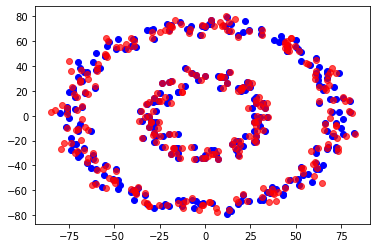

In [42]:
plt.scatter(df_ant3['I'][0:288], df_ant3['Q'][0:288], c = 'b')
plt.scatter(df_ant3['new_i'][0:288], df_ant3['new_q'][0:288], c = 'r', alpha = 0.7)

In [43]:
X12 = (df_ant1['I'] + 1j*df_ant1['Q']) * (df_ant2['I'] - 1j*df_ant2['Q'])
X23 = (df_ant2['I'] + 1j*df_ant2['Q']) * (df_ant3['I'] - 1j*df_ant3['Q'])
X13 = (df_ant1['I'] + 1j*df_ant1['Q']) * (df_ant3['I'] - 1j*df_ant3['Q'])
X12_opt = (df_ant1['new_i'] + 1j*df_ant1['new_q']) * (df_ant2['new_i'] - 1j*df_ant2['new_q'])
X23_opt = (df_ant2['new_i'] + 1j*df_ant2['new_q']) * (df_ant3['new_i'] - 1j*df_ant3['new_q'])
X13_opt = (df_ant1['new_i'] + 1j*df_ant1['new_q']) * (df_ant3['new_i'] - 1j*df_ant3['new_q'])

In [44]:
d = {'channel': df_ant1['Channel'],'omega':df_ant1['omega']}
data = pd.DataFrame(data=d)
data['phi12'] = np.angle(X12)
data['phi23'] = np.angle(X23)
data['phi13'] = np.angle(X13)
data['mag12'] = np.abs(X12)
data['mag23'] = np.abs(X23)
data['mag13'] = np.abs(X13)

In [45]:
data['phi12_opt'] = np.angle(X12_opt)
data['phi23_opt'] = np.angle(X23_opt)
data['phi13_opt'] = np.angle(X13_opt)
data['mag12_opt'] = np.abs(X12_opt)
data['mag23_opt'] = np.abs(X23_opt)
data['mag13_opt'] = np.abs(X13_opt)

In [46]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":data['channel'][i], "omega":data['omega'][i],
                       "ave_phi12": np.average(data['phi12'][i:i+96]),
                       "ave_phi23": np.average(data['phi23'][i:i+96]),
                        "ave_phi13": np.average(data['phi13'][i:i+96]),
                        "ave_phi12_opt": np.average(data['phi12_opt'][i:i+96]),
                       "ave_phi23_opt": np.average(data['phi23_opt'][i:i+96]),
                        "ave_phi13_opt": np.average(data['phi13_opt'][i:i+96]),
                       "ave_mag12": np.average(data['mag12'][i:i+96]),
                       "ave_mag23": np.average(data['mag23'][i:i+96]),
                       "ave_mag13": np.average(data['mag13'][i:i+96]),})
average_perchannel = pd.DataFrame(phi_channel)

In [47]:
print(np.average(average_perchannel['ave_phi12']), np.average(average_perchannel['ave_phi23']), np.average(average_perchannel['ave_phi13']),
     '\n', np.average(average_perchannel['ave_mag12']), np.average(average_perchannel['ave_mag23']), np.average(average_perchannel['ave_mag13']),
     '\n', (np.average(average_perchannel['ave_phi12'])/3+ np.average(average_perchannel['ave_phi23'])/3+ np.average(average_perchannel['ave_phi13'])/3),
     '\n', average_perchannel['ave_phi12'].std(), average_perchannel['ave_phi23'].std(), average_perchannel['ave_phi13'].std())

2.1590335480563616 1.7555820048236113 -2.3685697542996134 
 150824.8228360446 117851.3336439813 176054.56080207074 
 0.5153485995267864 
 0.2611620455999242 0.41159211245759825 0.26047948333367993


In [49]:
print(' angle per paire', np.average(average_perchannel['ave_phi12'])*180/np.pi, np.average(average_perchannel['ave_phi23'])*180/np.pi, np.average(average_perchannel['ave_phi13'])*180/np.pi,
     '\n average mag per paire', np.average(average_perchannel['ave_mag12']), np.average(average_perchannel['ave_mag23']), np.average(average_perchannel['ave_mag13']),
     '\n total average of angle', (np.average(average_perchannel['ave_phi12'])/3+ np.average(average_perchannel['ave_phi23'])/3+ np.average(average_perchannel['ave_phi13'])/3)*180/np.pi,
     '\n STD per paire', average_perchannel['ave_phi12'].std(), average_perchannel['ave_phi23'].std(), average_perchannel['ave_phi13'].std())

 angle per paire 123.70351013078512 100.58743946550865 -135.70905040370621 
 average mag per paire 150824.8228360446 117851.3336439813 176054.56080207074 
 total average of angle 29.527299730862513 
 STD per paire 0.2611620455999242 0.41159211245759825 0.26047948333367993


In [48]:
print(' Angle_per paire', np.average(average_perchannel['ave_phi12_opt'])*180/np.pi, np.average(average_perchannel['ave_phi23_opt'])*180/np.pi, np.average(average_perchannel['ave_phi13_opt'])*180/np.pi,
     '\n Average', (np.average(average_perchannel['ave_phi12_opt'])/3+ np.average(average_perchannel['ave_phi23_opt'])/3+ np.average(average_perchannel['ave_phi13_opt'])/3)*180/np.pi,
     '\n STD', average_perchannel['ave_phi12_opt'].std(), average_perchannel['ave_phi23_opt'].std(), average_perchannel['ave_phi13_opt'].std())

 Angle_per paire 123.55758202419679 100.89861579710052 -135.5438021787027 
 Average 29.637465214198205 
 STD 0.26110399202643686 0.41177577849028785 0.2618190886116334


In [8]:
# average_perchannel.unstack(level=0)[['ave_mag12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_mag12', legend=True)
# average_perchannel.unstack(level=0)[['ave_mag23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_mag23', legend=True)
# average_perchannel.unstack(level=0)[['ave_mag13']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='ave_mag13', legend=True)

In [9]:
# average_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_phi23', legend=True)
# average_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='ave_phi13', legend=True)

In [10]:
# average_perchannel

## Important Note:
for the next step, we have to correct the values based on the channel. meaning each value should be compared with the same channel. If the channels are the same, then the phi should be substracted from the other one. That's all.

# calculate the expected theta per antenna_per channel:

In [50]:
# cos45= np.power(2,0.5)/2 
measured_angle = 0
real_phi= measured_angle - 45
cos = np.cos(np.deg2rad(real_phi))
print(cos)
landa = 2.9e8/(average_perchannel.omega*1e6)
d12 = 3.5e-2
# ex_phi12 = (cos45* 2*np.pi*d12)/landa
# ex_phi13 = (cos45*2*2*np.pi*d12)/landa
ex_phi12 = (cos* 2*np.pi*d12)/landa
ex_phi13 = (cos*2*2*np.pi*d12)/landa

0.7071067811865476


In [51]:
np.average(ex_phi12*180/np.pi), np.max(ex_phi13)*180/np.pi, np.min(ex_phi13)*180/np.pi, np.average(ex_phi13*180/np.pi)

(74.98450902022674, 152.15353036624947, 147.7294802152672, 149.96901804045348)

In [52]:
average_perchannel['ex_phi12'] = ex_phi12
average_perchannel['ex_phi13'] = ex_phi13

In [14]:
# average_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['ex_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_phi12', legend=True)

In [15]:
# average_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['ex_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_phi12', legend=True)

In [16]:
average_perchannel.ave_phi12.mean()*180/np.pi, average_perchannel.ave_phi13.mean()*180/np.pi, 

(75.14711910455506, -110.97475106056737)

In [53]:
average_perchannel['correction_phi12'] = average_perchannel.ave_phi12 - average_perchannel.ex_phi12
average_perchannel['correction_phi13'] = average_perchannel.ave_phi13 - average_perchannel.ex_phi13
average_perchannel['correction_phi23'] = np.deg2rad(83.4) - average_perchannel.ex_phi12

### BUT not useful
For zero degrees

In [18]:
# average_perchannel['correction_phi12'] = np.deg2rad(129.2) - average_perchannel.ex_phi12 # for zero degree
# average_perchannel['correction_phi13'] = np.deg2rad(-137.2) - average_perchannel.ex_phi13
# average_perchannel['correction_phi23'] = np.deg2rad(83.4) - average_perchannel.ex_phi12

### BUT not useful
For 30 degrees, 

In [19]:
average_perchannel['correction_phi12'] = np.deg2rad(74.96) - average_perchannel.ex_phi12 # for 30degrees degree
average_perchannel['correction_phi13'] = np.deg2rad(74.42) - average_perchannel.ex_phi13
average_perchannel['correction_phi23'] = np.deg2rad(55.55) - average_perchannel.ex_phi12

### BUT not useful
for 45 degrees

In [20]:
average_perchannel['correction_phi12'] = np.deg2rad(73.68) - average_perchannel.ex_phi12 # for 45degrees degree
average_perchannel['correction_phi13'] = np.deg2rad(108.97) - average_perchannel.ex_phi13
average_perchannel['correction_phi23'] = np.deg2rad(73.2) - average_perchannel.ex_phi12

In [21]:
average_perchannel.ave_phi23.mean()*180/np.pi
# np.deg2rad(83.4)

63.58401218781873

In [22]:
# np.max(average_perchannel['correction_phi12'])*180/np.pi, np.max(average_perchannel['correction_phi13'])*180/np.pi, np.max(average_perchannel['correction_phi23'] )*180/np.pi, 

In [23]:
np.average(average_perchannel['correction_phi12'] )*180/np.pi, np.average(average_perchannel['correction_phi13'] )*90/np.pi, np.average(average_perchannel['correction_phi23'] )*180/np.pi, 

(-32.35487829614605, -51.54987829614607, -32.83487829614607)

In [24]:
# average_perchannel.unstack(level=0)[['correction_phi12']].plot(subplots=True, title="phase_correction", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['correction_phi13']].plot(subplots=True, title="phase_correction", color= '#5f0a0a', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['correction_phi23']].plot(subplots=True, title="phase_correction", color= '#ffaf00', label='ave_phi13', legend=True)

In [54]:
d2 = {"phi12_correction": average_perchannel.correction_phi12, 
     "phi23_correction": average_perchannel.correction_phi23,
     "phi13_correction": average_perchannel.correction_phi13,
     "channel":average_perchannel.channel,
     "omega":average_perchannel.omega,
     "ex_phi12": ex_phi12}
correction_coeff = pd.DataFrame(d2)
path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero'
correction_coeff.to_csv(path_coeff+'correction_coeff_negative_dasti_zero_optimized.csv', index = False)